## Diabetes Detection Project

This notebook contains the code developed for the Diabetes Detection Project. Throughout the document, all stages of the classification workflow are presented in a structured manner: data loading and exploration, data preprocessing, model construction and evaluation, and results analysis.

In addition to the code, detailed explanations are included to help understand each step taken and the methodological decisions made during the project.

#### DataSet Information

The Diabetes Health Indicators Dataset is a public dataset available on Kaggle and the UCI Machine Learning Repository (https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?). It originates from the CDC’s BRFSS (Behavioral Risk Factor Surveillance System) survey, a large-scale epidemiological study conducted in the United States. The dataset contains over 70,000 samples and 35 features that include demographic information, lifestyle habits, health indicators, and responses to medical questionnaires.

The task addressed in this project is a supervised classification problem, where the target variable represents the patient's diabetes status with three classes:

- 0: Healthy
- 1: Prediabetes
- 2: Diabetes

This dataset is particularly suitable for training and comparing classification models, evaluating imbalance-handling techniques, and analyzing the relevance of health-related variables.

| Variable             | Descripción                                                                                  | Valores posibles                                  |
|----------------------|----------------------------------------------------------------------------------------------|-------------------------------------------------|
| **Diabetes**         | Estado del paciente respecto a la diabetes                                                   | No, Pre-Diabetes, Diabetes                     |
| **HighBP**           | Hipertensión: presión arterial alta                                                         | No, Yes                                        |
| **HighChol**         | Colesterol alto                                                                              | No, Yes                                        |
| **CholCheck**        | Ha realizado un control de colesterol en los últimos 5 años                                  | No, Yes                                        |
| **Smoker**           | ¿Ha fumado al menos 100 cigarrillos en su vida?                                             | No, Yes                                        |
| **Stroke**           | ¿Ha tenido algún accidente cerebrovascular?                                                 | No, Yes                                        |
| **HeartAttack**      | Enfermedad cardíaca o infarto previo                                                        | No, Yes                                        |
| **PhysActivity**     | Ha realizado actividad física en los últimos 30 días                                        | No, Yes                                        |
| **Fruits**           | Consume fruta al menos una vez al día                                                      | No, Yes                                        |
| **Veggies**          | Consume verduras al menos una vez al día                                                  | No, Yes                                        |
| **Heavy_drinking**   | Consumo excesivo de alcohol (hombres >14, mujeres >7 bebidas/semana)                        | No, Yes                                        |
| **HealthCare**       | Tiene algún tipo de cobertura sanitaria (seguro, HMO, etc.)                                 | No, Yes                                        |
| **Unaffordable_care**| ¿Ha necesitado atención médica en los últimos 12 meses pero no pudo por coste?              | No, Yes                                        |
| **GeneralHealth**    | Salud general percibida                                                                      | Excellent, Very Good, Good, Fair, Poor        |
| **PhysicalHealth**   | Número de días en el último mes con problemas físicos                                        | Valor numérico (0-30)                          |
| **MentalHealth**     | Número de días en el último mes con problemas mentales                                       | Valor numérico (0-30)                          |
| **DiffWalk**         | ¿Tiene dificultad para caminar o subir escaleras?                                           | No, Yes                                        |
| **Sex**              | Sexo del paciente                                                                            | Female, Male                                   |


In [99]:
import pandas as pd

# Ruta del archivo CSV
archivo_csv = "../data/diabetes_012_health_indicators_BRFSS2015.csv"

# Cargar el CSV en un DataFrame
df = pd.read_csv(archivo_csv)
df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


Hacemos un primer estudio de los tipos de datos, ya que en su mayoria son valores numéricos, pero pueden existir variables categoricas, y tipos que debamos corregir.

In [100]:
# Mostrar valores únicos de cada columna (útil para inspeccionar)
for col in df.columns:
    print(f"\nColumna: {col}")
    print(df[col].dtype, df[col].unique()[:10])  


Columna: Diabetes_012
float64 [0. 2. 1.]

Columna: HighBP
float64 [1. 0.]

Columna: HighChol
float64 [1. 0.]

Columna: CholCheck
float64 [1. 0.]

Columna: BMI
float64 [40. 25. 28. 27. 24. 30. 34. 26. 33. 21.]

Columna: Smoker
float64 [1. 0.]

Columna: Stroke
float64 [0. 1.]

Columna: HeartDiseaseorAttack
float64 [0. 1.]

Columna: PhysActivity
float64 [0. 1.]

Columna: Fruits
float64 [0. 1.]

Columna: Veggies
float64 [1. 0.]

Columna: HvyAlcoholConsump
float64 [0. 1.]

Columna: AnyHealthcare
float64 [1. 0.]

Columna: NoDocbcCost
float64 [0. 1.]

Columna: GenHlth
float64 [5. 3. 2. 4. 1.]

Columna: MentHlth
float64 [18.  0. 30.  3.  5. 15. 10.  6. 20.  2.]

Columna: PhysHlth
float64 [15.  0. 30.  2. 14. 28.  7. 20.  3. 10.]

Columna: DiffWalk
float64 [1. 0.]

Columna: Sex
float64 [0. 1.]

Columna: Age
float64 [ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.]

Columna: Education
float64 [4. 6. 3. 5. 2. 1.]

Columna: Income
float64 [3. 1. 8. 6. 4. 7. 2. 5.]


In [101]:
# Columnas diabetes = Target
df.rename(columns={'Diabetes_012': 'Diabetes'}, inplace=True)
df['Diabetes'] = df['Diabetes'].astype(int)  
df['Diabetes'] = df['Diabetes'].map({0: 'No', 1: 'Pre-Diabetes', 2: 'Diabetes'}).astype('category')

# High Blood Pressure
df['HighBP'] = df['HighBP'].astype(int)  
df['HighBP'] = df['HighBP'].map({0: 'No', 1: 'Yes'}).astype('category')

# High Cholesterol
df['HighChol'] = df['HighChol'].astype(int)  
df['HighChol'] = df['HighChol'].map({0: 'No', 1: 'Yes'}).astype('category')

# Cholesterol check in 5 years
df['CholCheck'] = df['CholCheck'].astype(int)  
df['CholCheck'] = df['CholCheck'].map({0: 'No', 1: 'Yes'}).astype('category')

# Smoker: have you smoked at least 100 cigarettes in your entire life?
df['Smoker'] = df['Smoker'].astype(int)  
df['Smoker'] = df['Smoker'].map({0: 'No', 1: 'Yes'}).astype('category')

# Stroke: do you now have or have you ever had a stroke? (accidente cerebrovascular)
df['Stroke'] = df['Stroke'].astype(int)  
df['Stroke'] = df['Stroke'].map({0: 'No', 1: 'Yes'}).astype('category')

# Heart disease or heart attack: 
df.rename(columns={'HeartDiseaseorAttack': 'HeartAttack'}, inplace=True)
df['HeartAttack'] = df['HeartAttack'].astype(int)  
df['HeartAttack'] = df['HeartAttack'].map({0: 'No', 1: 'Yes'}).astype('category')

# Pyshical activity in past 30 days
df['PhysActivity'] = df['PhysActivity'].astype(int)  
df['PhysActivity'] = df['PhysActivity'].map({0: 'No', 1: 'Yes'}).astype('category')

# Consume Fruit 1 or more times per day
df['Fruits'] = df['Fruits'].astype(int)  
df['Fruits'] = df['Fruits'].map({0: 'No', 1: 'Yes'}).astype('category')

# Consume veggies 1 or more times per day
df['Veggies'] = df['Veggies'].astype(int)  
df['Veggies'] = df['Veggies'].map({0: 'No', 1: 'Yes'}).astype('category')

# Alcohol Consumer: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
df.rename(columns={'HvyAlcoholConsump': 'Heavy_drinking'}, inplace=True)
df['Heavy_drinking'] = df['Heavy_drinking'].astype(int)  
df['Heavy_drinking'] = df['Heavy_drinking'].map({0: 'No', 1: 'Yes'}).astype('category')

# Health Care: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.
df.rename(columns={'AnyHealthcare': 'HealthCare'}, inplace=True)
df['HealthCare'] = df['HealthCare'].astype(int)  
df['HealthCare'] = df['HealthCare'].map({0: 'No', 1: 'Yes'}).astype('category')

# Unaffordable_care: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?df.rename(columns={'AnyHealthcare': 'HealthCare'}, inplace=True)
df.rename(columns={'NoDocbcCost': 'Unaffordable_care'}, inplace=True)
df['Unaffordable_care'] = df['Unaffordable_care'].astype(int)  
df['Unaffordable_care'] = df['Unaffordable_care'].map({0: 'No', 1: 'Yes'}).astype('category')

#  General Health: would you say that in general your health is: 1-5: 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
df.rename(columns={'GenHlth': 'GeneralHealth'}, inplace=True)
df['GeneralHealth'] = df['GeneralHealth'].astype(int)  
df['GeneralHealth'] = df['GeneralHealth'].map({1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'}).astype('category')

#  Mental Health and physical health
df.rename(columns={'GenHlth': 'GeneralHealth'}, inplace=True)
df.rename(columns={'PhysHlth': 'PhysicalHealth'}, inplace=True)

# Difficulty walking : Do you have serious difficulty walking or climbing stairs?
df['DiffWalk'] = df['DiffWalk'].astype(int)  
df['DiffWalk'] = df['DiffWalk'].map({0: 'No', 1: 'Yes'}).astype('category')

# Sex: 0 = female, 1 = male
df['Sex'] = df['Sex'].astype(int)  
df['Sex'] = df['Sex'].map({0: 'Female', 1: 'Male'}).astype('category')

df.head(5)

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartAttack,PhysActivity,Fruits,...,HealthCare,Unaffordable_care,GeneralHealth,MentHlth,PhysicalHealth,DiffWalk,Sex,Age,Education,Income
0,No,Yes,Yes,Yes,40.0,Yes,No,No,No,No,...,Yes,No,Poor,18.0,15.0,Yes,Female,9.0,4.0,3.0
1,No,No,No,No,25.0,Yes,No,No,Yes,No,...,No,Yes,Good,0.0,0.0,No,Female,7.0,6.0,1.0
2,No,Yes,Yes,Yes,28.0,No,No,No,No,Yes,...,Yes,Yes,Poor,30.0,30.0,Yes,Female,9.0,4.0,8.0
3,No,Yes,No,Yes,27.0,No,No,No,Yes,Yes,...,Yes,No,Very Good,0.0,0.0,No,Female,11.0,3.0,6.0
4,No,Yes,Yes,Yes,24.0,No,No,No,Yes,Yes,...,Yes,No,Very Good,3.0,0.0,No,Female,11.0,5.0,4.0


Vamos a entender la forma de nuestros dataset, los tipos de los atributos una vez corregidos, y si alguno de ellos contiene valores nulos:

In [102]:
print("📌 Dimensiones del dataset:")
print(df.shape)

summary = pd.DataFrame({
    'dtype': df.dtypes,
    'nulls': df.isnull().sum(),
})

print(summary)

📌 Dimensiones del dataset:
(253680, 22)
                      dtype  nulls
Diabetes           category      0
HighBP             category      0
HighChol           category      0
CholCheck          category      0
BMI                 float64      0
Smoker             category      0
Stroke             category      0
HeartAttack        category      0
PhysActivity       category      0
Fruits             category      0
Veggies            category      0
Heavy_drinking     category      0
HealthCare         category      0
Unaffordable_care  category      0
GeneralHealth      category      0
MentHlth            float64      0
PhysicalHealth      float64      0
DiffWalk           category      0
Sex                category      0
Age                 float64      0
Education           float64      0
Income              float64      0


In [103]:
cols_numeric = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cols_categorical = df.select_dtypes(include=['category']).columns.tolist()

print("\n📌 Columnas numéricas:", cols_numeric)
print("📌 Columnas categóricas:", cols_categorical)


📌 Columnas numéricas: ['BMI', 'MentHlth', 'PhysicalHealth', 'Age', 'Education', 'Income']
📌 Columnas categóricas: ['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartAttack', 'PhysActivity', 'Fruits', 'Veggies', 'Heavy_drinking', 'HealthCare', 'Unaffordable_care', 'GeneralHealth', 'DiffWalk', 'Sex']


In [104]:
print("\n📌 Estadísticas descriptivas (numéricas):")
print(df[cols_numeric].describe())


📌 Estadísticas descriptivas (numéricas):
                 BMI       MentHlth  PhysicalHealth            Age  \
count  253680.000000  253680.000000   253680.000000  253680.000000   
mean       28.382364       3.184772        4.242081       8.032119   
std         6.608694       7.412847        8.717951       3.054220   
min        12.000000       0.000000        0.000000       1.000000   
25%        24.000000       0.000000        0.000000       6.000000   
50%        27.000000       0.000000        0.000000       8.000000   
75%        31.000000       2.000000        3.000000      10.000000   
max        98.000000      30.000000       30.000000      13.000000   

           Education         Income  
count  253680.000000  253680.000000  
mean        5.050434       6.053875  
std         0.985774       2.071148  
min         1.000000       1.000000  
25%         4.000000       5.000000  
50%         5.000000       7.000000  
75%         6.000000       8.000000  
max         6.000000   

In [105]:
print("\n📌 Distribución de categorías:")
for col in cols_categorical:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(normalize=True) * 100)


📌 Distribución de categorías:

--- Diabetes ---
Diabetes
No              84.241170
Diabetes        13.933302
Pre-Diabetes     1.825528
Name: proportion, dtype: float64

--- HighBP ---
HighBP
No     57.09989
Yes    42.90011
Name: proportion, dtype: float64

--- HighChol ---
HighChol
No     57.587906
Yes    42.412094
Name: proportion, dtype: float64

--- CholCheck ---
CholCheck
Yes    96.26695
No      3.73305
Name: proportion, dtype: float64

--- Smoker ---
Smoker
No     55.683144
Yes    44.316856
Name: proportion, dtype: float64

--- Stroke ---
Stroke
No     95.94292
Yes     4.05708
Name: proportion, dtype: float64

--- HeartAttack ---
HeartAttack
No     90.581441
Yes     9.418559
Name: proportion, dtype: float64

--- PhysActivity ---
PhysActivity
Yes    75.654368
No     24.345632
Name: proportion, dtype: float64

--- Fruits ---
Fruits
Yes    63.425576
No     36.574424
Name: proportion, dtype: float64

--- Veggies ---
Veggies
Yes    81.14199
No     18.85801
Name: proportion, dtype: flo

In [106]:
from scipy import stats
import numpy as np


print("\n📌 Outliers detectados (Z-score > 3):")
for col in cols_numeric:
    zs = np.abs(stats.zscore(df[col]))
    outliers = (zs > 3).sum()
    print(f"{col}: {outliers} outliers")

print("\n📌 Outliers detectados usando IQR:")
for col in cols_numeric:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))][col].count()
    print(f"{col}: {outliers} outliers")


📌 Outliers detectados (Z-score > 3):
BMI: 2963 outliers
MentHlth: 12697 outliers
PhysicalHealth: 0 outliers
Age: 0 outliers
Education: 4217 outliers
Income: 0 outliers

📌 Outliers detectados usando IQR:
BMI: 9847 outliers
MentHlth: 36208 outliers
PhysicalHealth: 40949 outliers
Age: 0 outliers
Education: 0 outliers
Income: 0 outliers


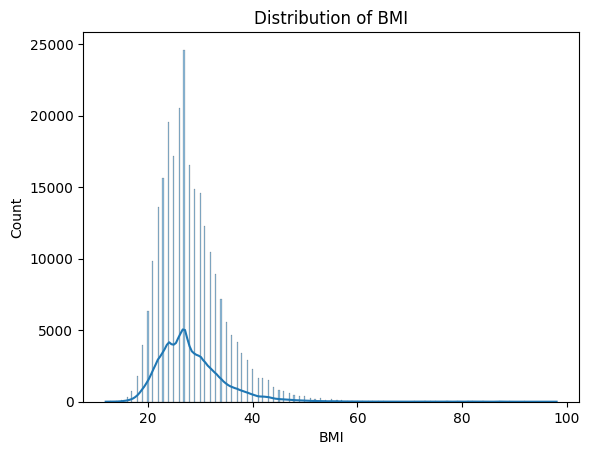

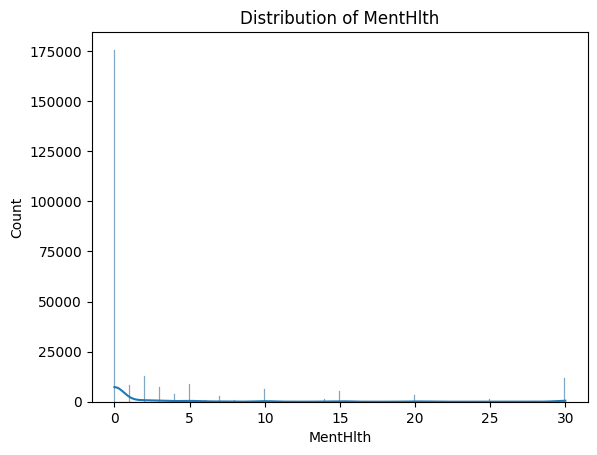

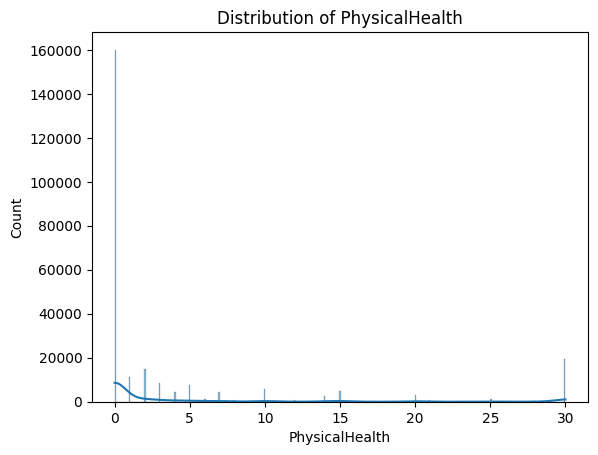

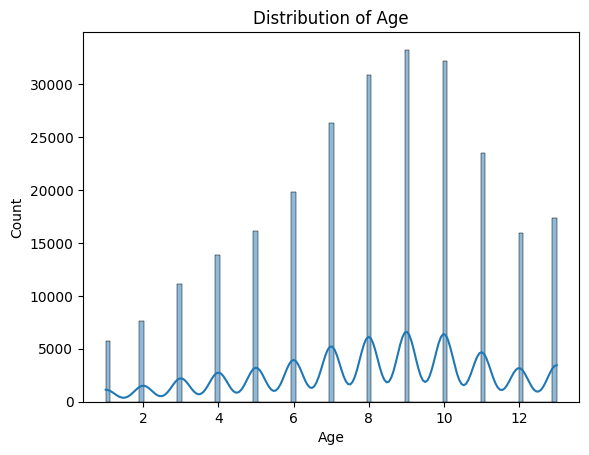

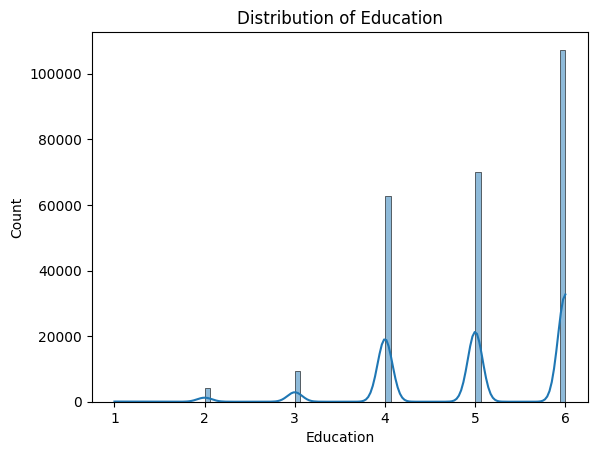

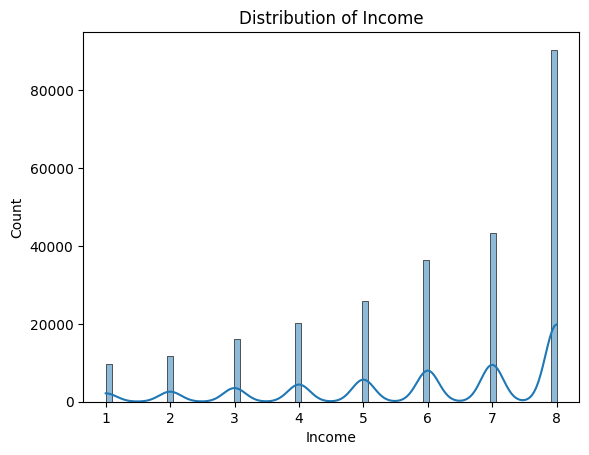

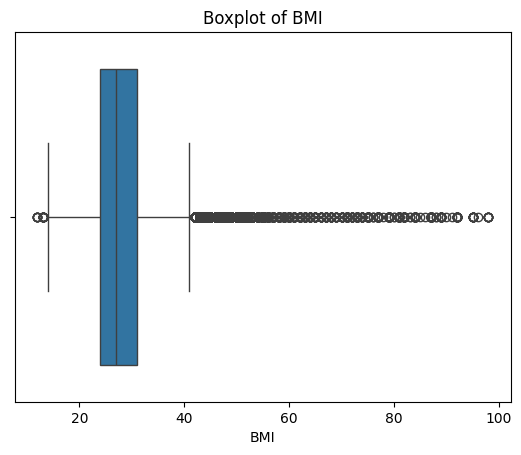

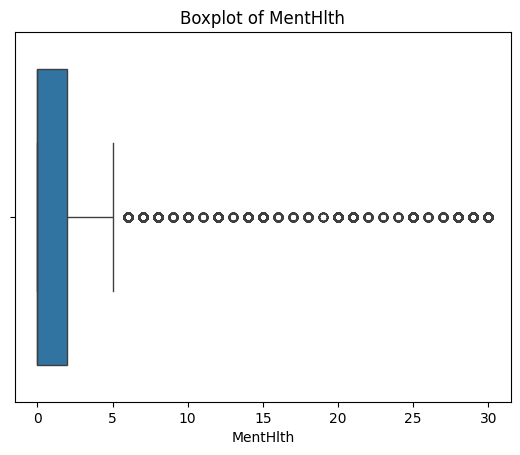

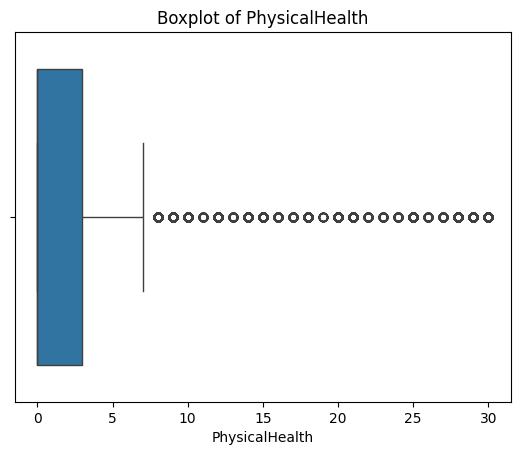

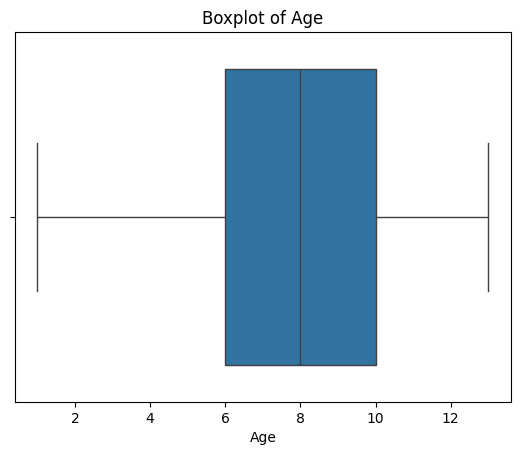

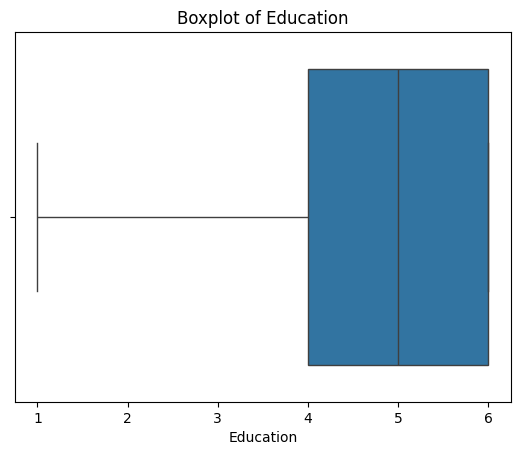

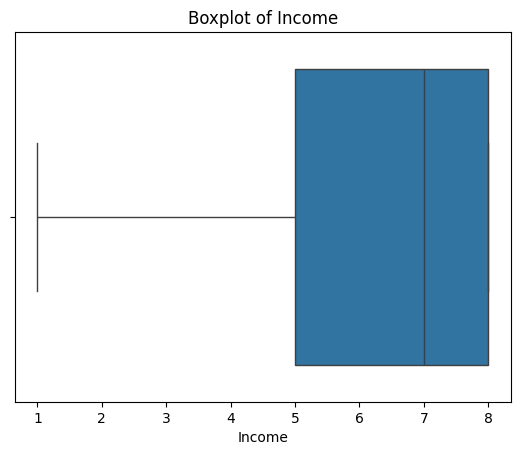

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns


for col in cols_numeric:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplots for outliers
for col in cols_numeric:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()